
Mean Absolute Error (MAE): 2.07
Mean Squared Error (MSE): 10.83
Root Mean Squared Error (RMSE): 3.29
R² Score: -0.95


<ipython-input-22-9410af471afc>:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

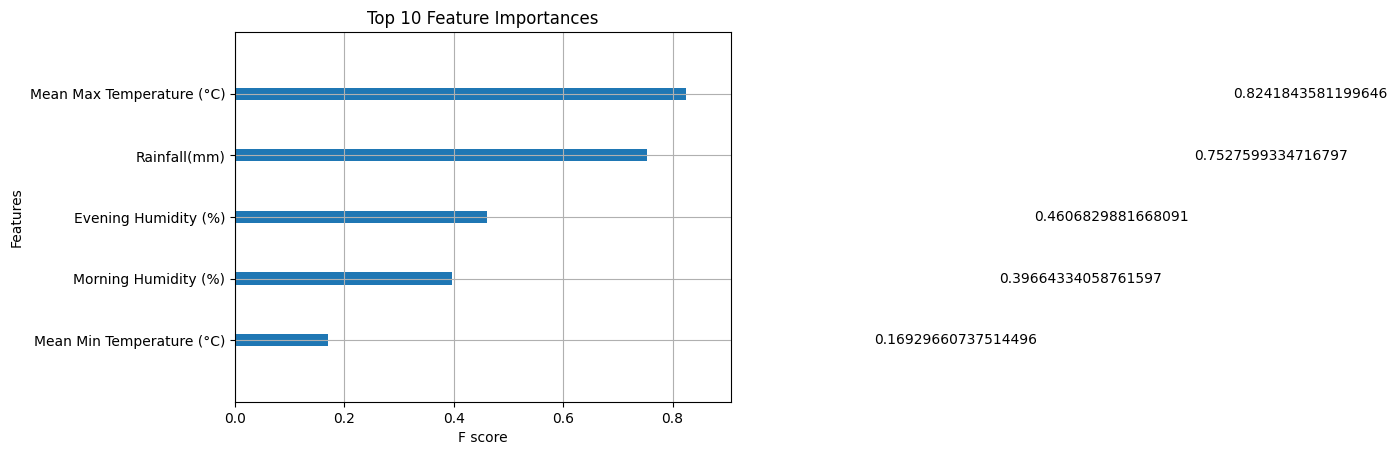

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data with appropriate encoding
file_path = '/content/sample_data/Jharkhand_Final_Data(Sheet1).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 2. Preprocessing
def convert_range_to_avg(val):
    if isinstance(val, str) and 'to' in val:
        try:
            parts = val.split('to')
            return (float(parts[0].strip()) + float(parts[1].strip())) / 2
        except:
            return None
    try:
        return float(val)
    except:
        return val

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(convert_range_to_avg)

df = df.dropna()

# 3. Define features and target
target_column = 'GWL (In mbgl)'
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encode if necessary
X = pd.get_dummies(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 7. Feature Importance Plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
